https://www.kaggle.com/code/karnikakapoor/diamond-price-prediction?select=diamonds.csv

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

 # <h1 style='background:#a9a799; border:0; color:black'><center>Price Prediction Of Diamonds: Regression</center></h1>
   ![diamands%20project.png](attachment:diamands%20project.png)
   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 style='background:#a9a799; border:0; color:black'><center>INDEX</center></h1>

[1. IMPORTING LIBRARIES](#1)     
[2. LOADING DATA](#2)    
[3. DATA PREPROCESSING](#3)     
[4. MODEL BUILDING](#4)     
[5. FIN](#5)

<a id="1"></a>
<h1 style='background:#a9a799; border:0; color:black'><center>LIBRARIES</center></h1>

# Importing Libraries


In [2]:
#All the libralies used in this project

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [3]:
import xgboost as xgb
import sklearn

print("XGBoost version:", xgb.__version__)
print("Scikit-learn version:", sklearn.__version__)


XGBoost version: 2.1.1
Scikit-learn version: 1.3.2


<a id="2"></a>
<h1 style='background:#a9a799; border:0; color:black'><center>LOADING DATA</center></h1>

# Loading Data

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset including the target ie. price.

**Feature description**:

**price** price in US dollars (\$326--\$18,823)This is the target column containing tags for the features.

**The 4 Cs of Diamonds:-**

**carat (0.2--5.01)**
The carat is the diamond’s physical weight measured in metric carats.  One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs.

**cut (Fair, Good, Very Good, Premium, Ideal)**
In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.

**color, from J (worst) to D (best)**
The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.

**clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))**
Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.

**Dimensions**

**x length in mm (0--10.74)**

**y width in mm (0--58.9)**

**z depth in mm (0--31.8)**


![diamands%20project%20%281%29.png](attachment:diamands%20project%20%281%29.png)

**depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)**
The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface).

**table width of the top of the diamond relative to widest point (43--95)**

A diamond's table refers to the flat facet of the diamond seen when the stone is face up. The main purpose of a diamond table is to refract entering light rays and allow reflected light rays from within the diamond to meet the observer’s eye. The ideal table cut diamond will give the diamond stunning fire and brilliance.


In [4]:
data = pd.read_csv("/content/input/diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
data.shape

(53940, 11)

<a id="3"></a>
 <h2 style='background:#a9a799; border:0; color:black'><center>DATA PREPROCESSING</center></h2>
# Data Preprocessing
**Steps involved in Data Preprocessing**
* Data cleaning
* Identifying and removing outliers
* Encoding categorical variables


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


The first column is an index ("Unnamed: 0") and thus we are going to remove it.

In [7]:
#The first column seems to be just index
data = data.drop(["Unnamed: 0"], axis=1)
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Points to notice:**

Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points.

In [8]:
#Dropping dimentionless diamonds
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(53920, 10)

We lost 20 data points by deleting the dimensionless(2-D or 1-D) diamonds.

**Pairplot Of Data**

KeyboardInterrupt: 

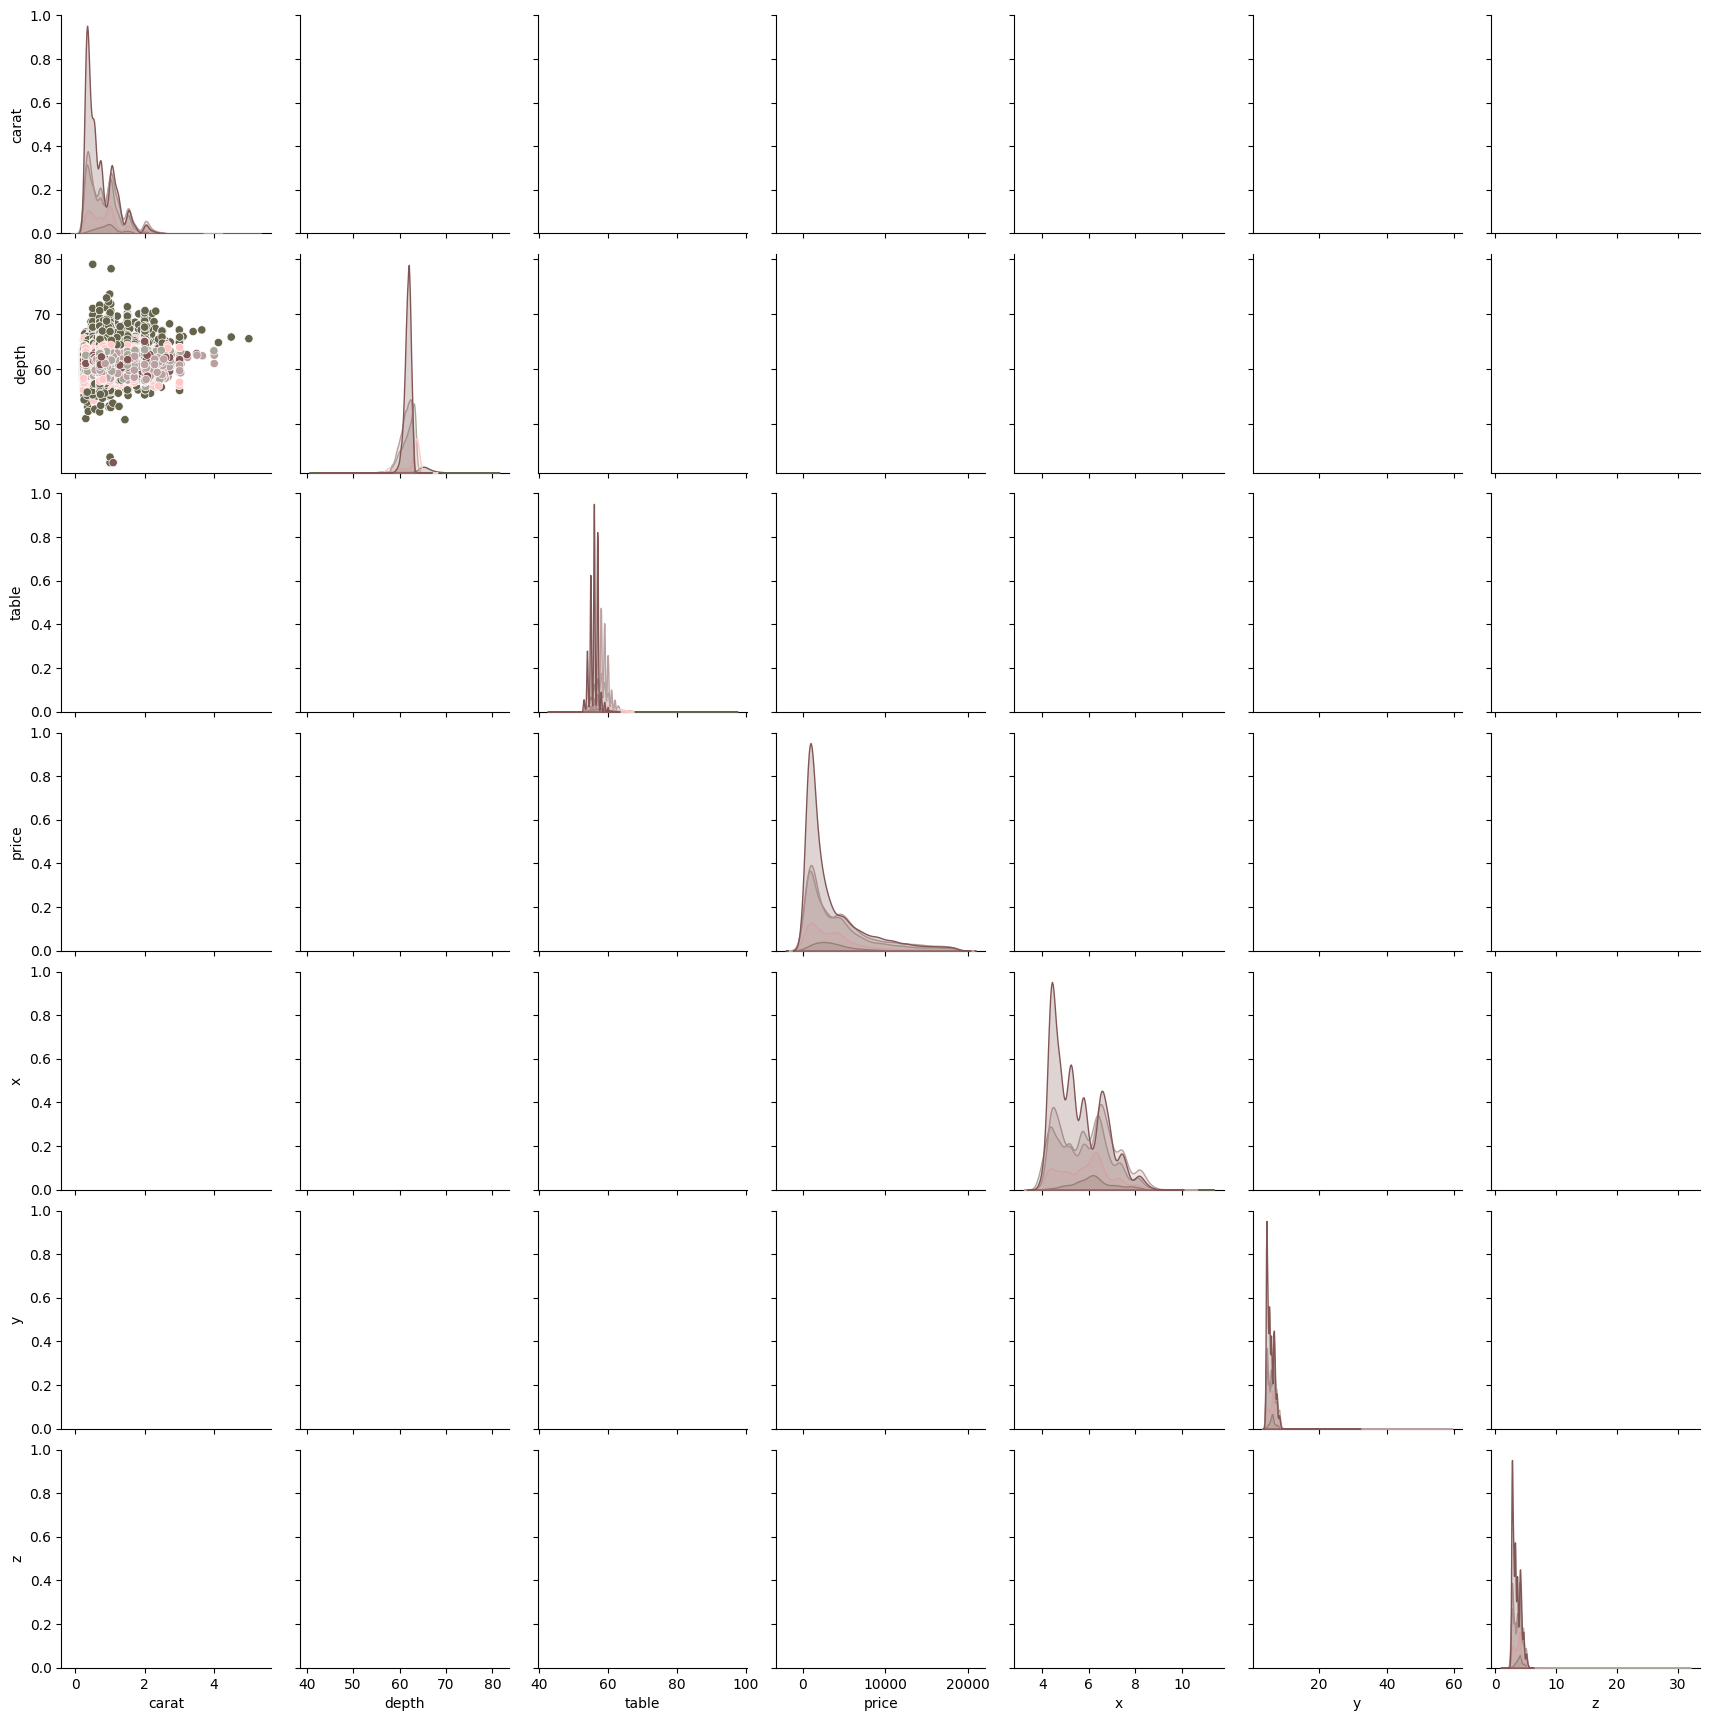

In [9]:
#Let's have a look at data
shade = ["#835656", "#baa0a0", "#ffc7c8", "#a9a799", "#65634a"]#shades for hue
ax = sns.pairplot(data, hue= "cut",palette=shade)# I chose "cut" as hue. We can also examine other attributes in hue with less value count.


**A few points to notice in these pair plots**

There are some features with datapoint that are far from the rest of the dataset which will affect the outcome of our regression model.

* "y" and "z" have some dimensional outlies in our dataset that needs to be eliminated.
* The "depth" should be capped but we must examine the regression line to be sure.
* The "table" featured should be capped too.
* Let's have a look at regression plots to get a close look at the outliers.

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

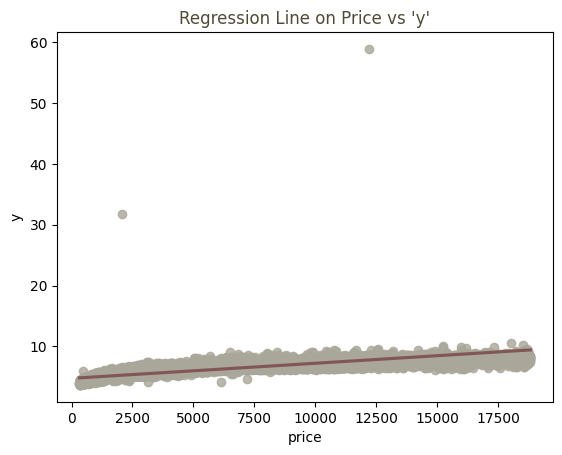

In [ ]:
ax = sns.regplot(x="price", y="y", data=data, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'y'", color="#4e4c39")

Text(0.5, 1.0, "Regression Line on Price vs 'z'")

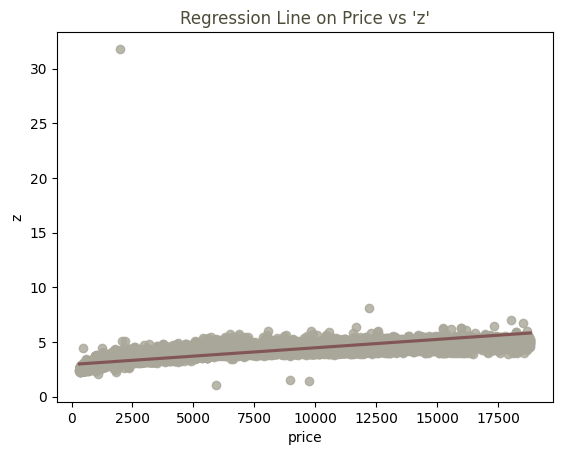

In [ ]:
ax= sns.regplot(x="price", y="z", data=data, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs 'z'", color="#4e4c39")

Text(0.5, 1.0, 'Regression Line on Price vs Depth')

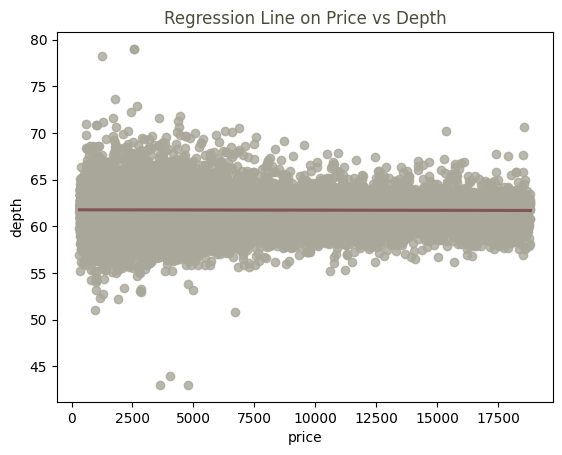

In [ ]:
ax= sns.regplot(x="price", y="depth", data=data, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs Depth", color="#4e4c39")

Text(0.5, 1.0, 'Regression Line on Price vs Table')

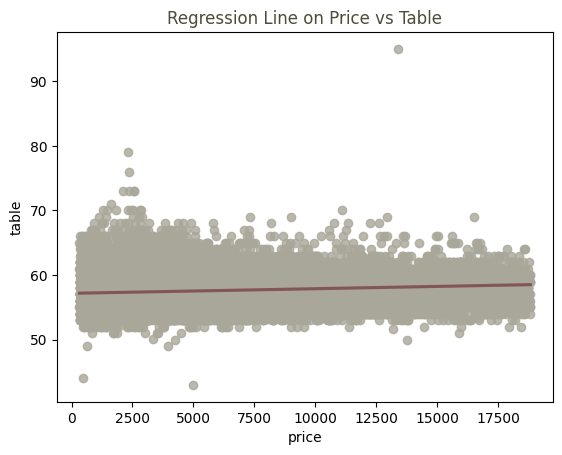

In [ ]:
ax=sns.regplot(x="price", y="table", data=data, fit_reg=True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
ax.set_title("Regression Line on Price vs Table", color="#4e4c39")

We can clearly spot outliers in these attributes. Next up, we will remove these data points.

In [11]:
#Dropping the outliers.
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(53907, 10)

We can clearly spot outliers in these attributes. Next up, we will remove these data points.Now that we have removed regression outliers, let us have a look at the pair plot of data in our hand.

In [ ]:
ax=sns.pairplot(data, hue= "cut",palette=shade)

Output hidden; open in https://colab.research.google.com to view.

That's a much cleaner dataset.
Next, we will deal with the categorical variables.

In [12]:
# Get list of categorical variables
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


We have three categorical variables.
Let us have a look at them.

<ipython-input-21-68abbf5ba526>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="cut",y="price", data=data, palette=shade,scale= "count")
<ipython-input-21-68abbf5ba526>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x="cut",y="price", data=data, palette=shade,scale= "count")


Text(0.5, 0, 'Cut')

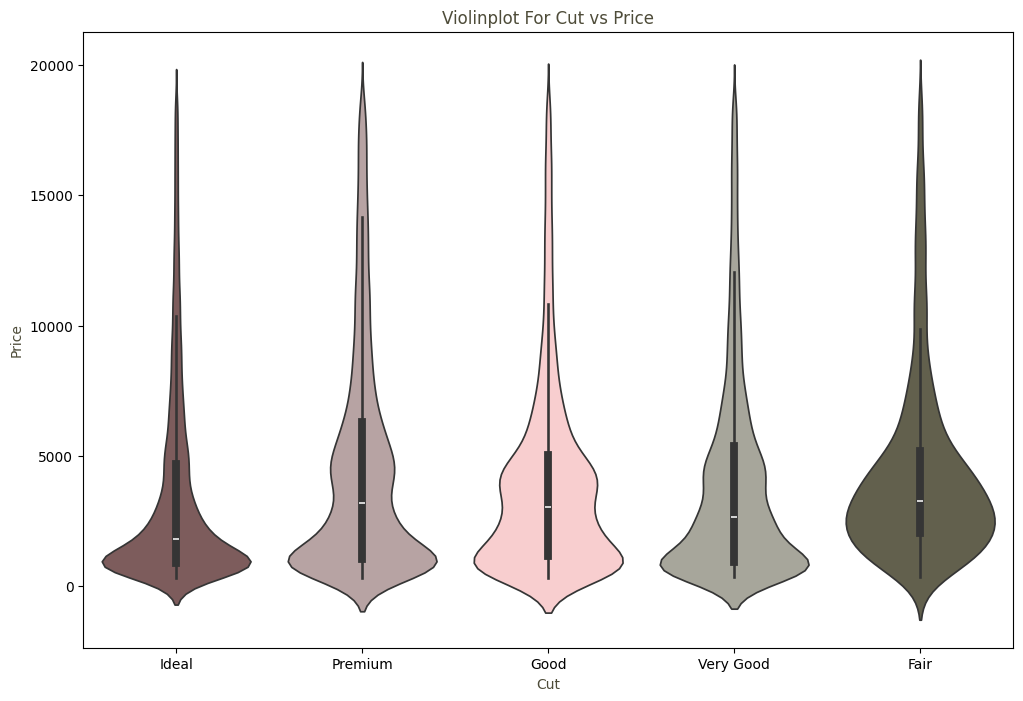

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="cut",y="price", data=data, palette=shade,scale= "count")
ax.set_title("Violinplot For Cut vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Cut", color="#4e4c39")

<ipython-input-22-740024ef91d4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="color",y="price", data=data, palette=shade_1,scale= "count")
<ipython-input-22-740024ef91d4>:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x="color",y="price", data=data, palette=shade_1,scale= "count")


Text(0.5, 0, 'Color')

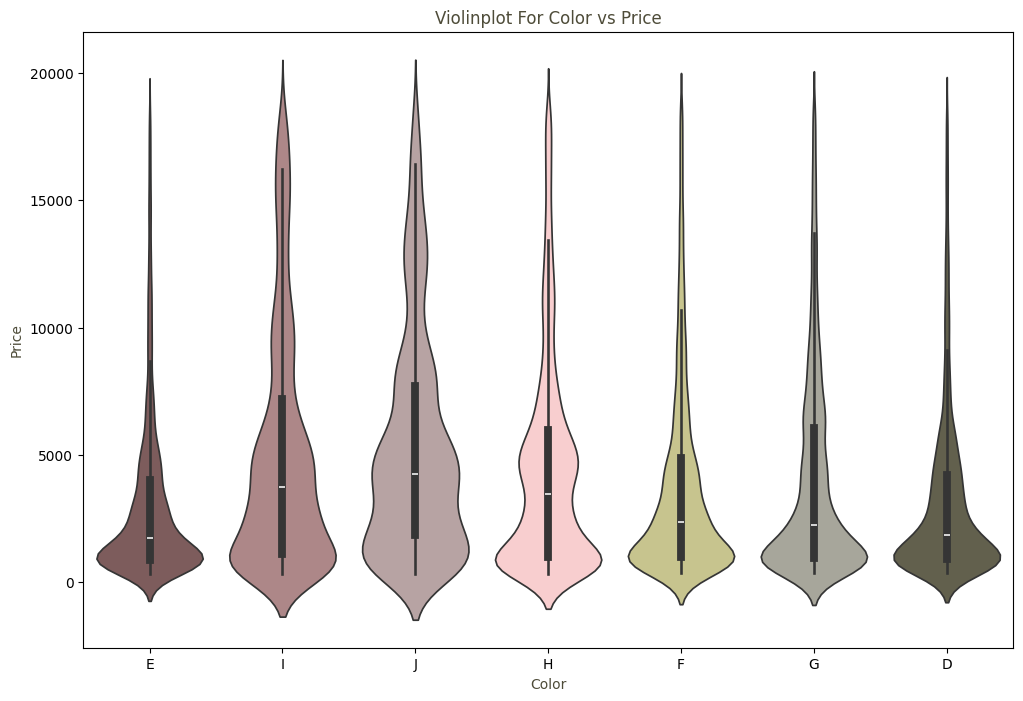

In [ ]:
plt.figure(figsize=(12,8))
shade_1 = ["#835656","#b38182", "#baa0a0","#ffc7c8","#d0cd85", "#a9a799", "#65634a"]
ax = sns.violinplot(x="color",y="price", data=data, palette=shade_1,scale= "count")
ax.set_title("Violinplot For Color vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Color", color="#4e4c39")

<ipython-input-23-708efa409eea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="clarity",y="price", data=data, palette=shade_2,scale= "count")
<ipython-input-23-708efa409eea>:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x="clarity",y="price", data=data, palette=shade_2,scale= "count")


Text(0.5, 0, 'Clarity')

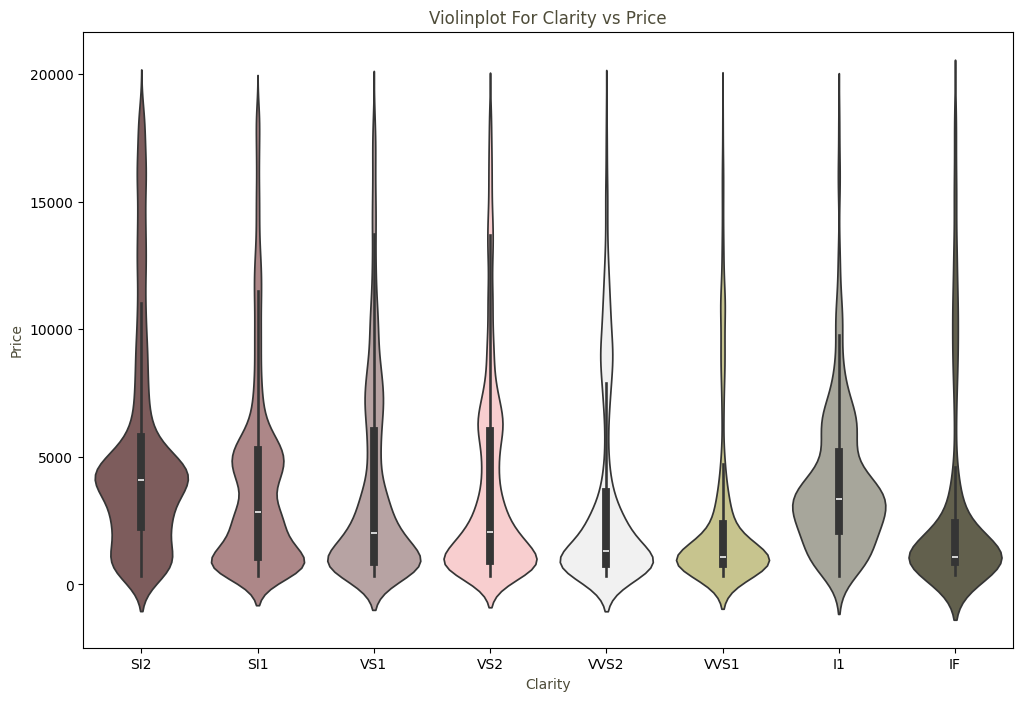

In [ ]:
plt.figure(figsize=(12,8))
shade_2 = ["#835656","#b38182", "#baa0a0","#ffc7c8","#f1f1f1","#d0cd85", "#a9a799", "#65634a"]
ax = sns.violinplot(x="clarity",y="price", data=data, palette=shade_2,scale= "count")
ax.set_title("Violinplot For Clarity vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Clarity", color="#4e4c39")

Lable encoding the data to get rid of object dtype.

In [13]:
# Make copy to avoid changing original data
label_data = data.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [14]:
data.describe()

,carat,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


<Axes: >

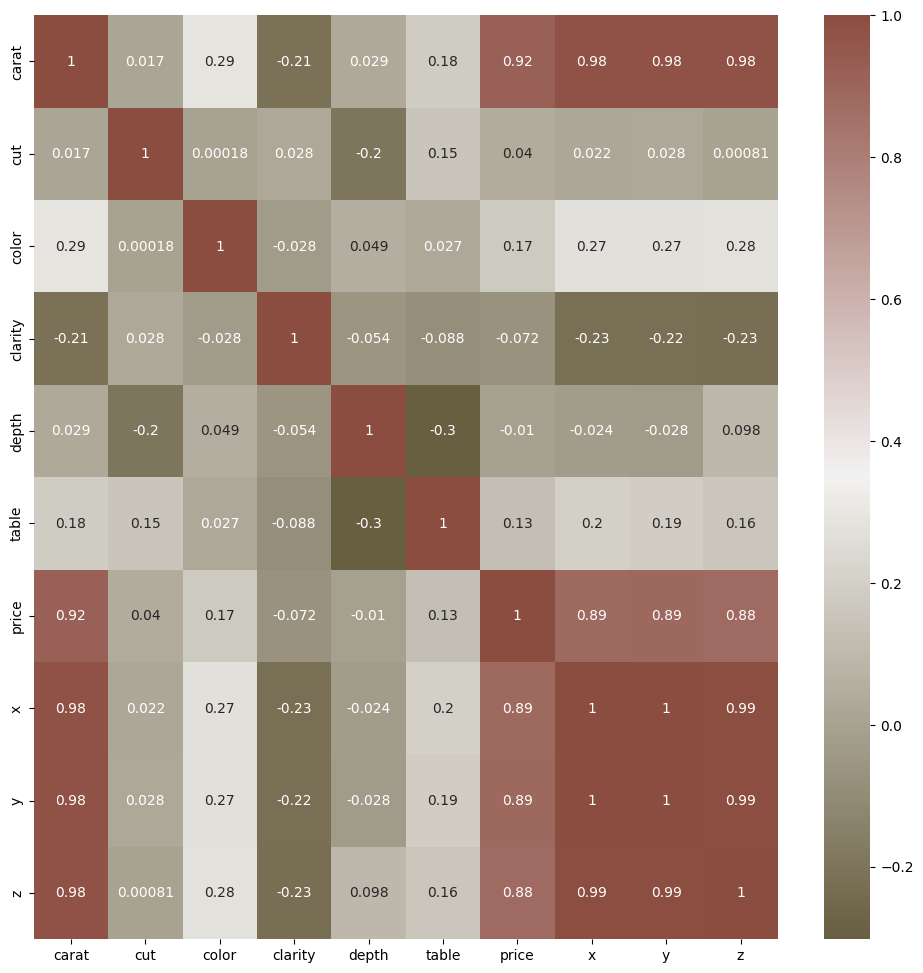

In [ ]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

**Points to notice:**
* "x", "y" and "z" show a high correlation to the target column.
* "depth", "cut" and "table" show low correlation. We could consider dropping but let's keep it.


<a id="4"></a>
 <h1 style='background:#a9a799; border:0; color:black'><center>MODEL BUILDING</center></h1>
# Model Building

**Steps involved in Model Building**

* Setting up features and target
* Build a pipeline of standard scalar and model for five different regressors.
* Fit all the models on training data
* Get mean of cross-validation on the training set for all the models for negative root mean square error
* Pick the model with the best cross-validation score
* Fit the best model on the training set and get

In [15]:
# Assigning the featurs as X and trarget as y
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [16]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [ ]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1348.811824 
DecisionTree: -751.097634 
RandomForest: -548.880777 
KNeighbors: -823.648809 
XGBRegressor: -547.645088 


**Testing the Model with the best score on the test set**

In the above scores, XGBClassifier appears to be the model with the best scoring on negative root mean square error. Let's test this model on a test set and evaluate it with different parameters.

In [17]:
# prompt: Export pipeline_xgb

import pickle
filename = 'pipeline_xgb.sav'
pickle.dump(pipeline_xgb, open(filename, 'wb'))


In [ ]:
# prompt: Load pipeline_xgb

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


In [ ]:
label_data['pred'] = loaded_model.predict(X)
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,pred
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,295.188843
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,343.483398
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,348.368164
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,426.780762
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,278.038330


In [ ]:
# Model prediction on test data
pred = pipeline_xgb.predict(X_test)

In [ ]:
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

**<span style="color:#65634a;"> If you liked this Notebook, please do upvote.</span>**

**<span style="color:#65634a;"> If you have any suggestions or questions, I am all ears!</span>**

**<span style="color:#65634a;">Best Wishes!</span>**

<a id="5"></a>
# <h1 style='background:#a9a799; border:0; color:black'><center>FIN</center></h1>